# 基础用法

In [1]:
# 载入 tensorflow
import tensorflow as tf

# Build our graph nodes, starting from the inputs
a = tf.constant(5, name="input_a")
b = tf.constant(3, name="input_b")
c = tf.multiply(a,b, name="mul_c")
d = tf.add(a,b, name="add_d")
e = tf.add(c,d, name="add_e")

# Open up a TensorFlow Session
sess = tf.Session()

# Execute our output node, using our Session
output = sess.run(e)

# Open a TensorFlow FileWriter to write our graph to disk
writer = tf.summary.FileWriter('../graph/my_graph', sess.graph)

# Close our FileWriter and Session objects
writer.close()
sess.close()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


为了运行 TensorBoard 需要在 command 执行:

```
$ tensorboard --logdir='./my_graph'
```

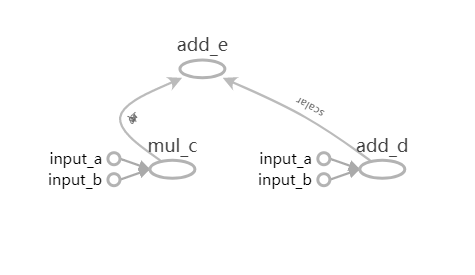

In [2]:
from IPython.display import Image

Image('img/png.png', width=400, height=80)

# Name Scope

In [3]:
import tensorflow as tf

with tf.name_scope("Scope_A"):
    a = tf.add(1, 2, name="A_add")
    b = tf.multiply(a, 3, name="A_mul")

with tf.name_scope("Scope_B"):
    c = tf.add(4, 5, name="B_add")
    d = tf.multiply(c, 6, name="B_mul")

e = tf.add(b, d, name="output")

writer = tf.summary.FileWriter('../graph/name_scope_1', graph=tf.get_default_graph())
writer.close()

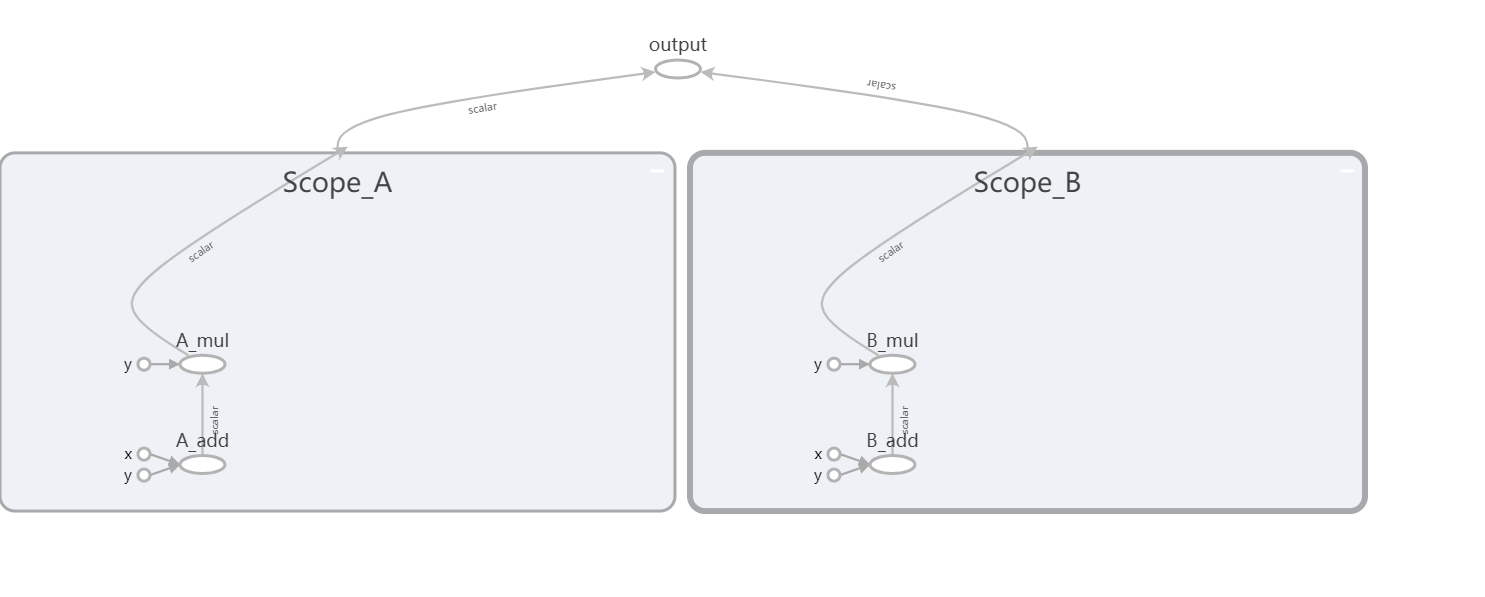

In [6]:
Image('img/name_scope.png', width=600, height=200)

# Graph

In [8]:
graph = tf.Graph()

with graph.as_default():
    in_1 = tf.placeholder(tf.float32, shape=[], name="input_a")
    in_2 = tf.placeholder(tf.float32, shape=[], name="input_b")
    const = tf.constant(3, dtype=tf.float32, name="static_value")

    with tf.name_scope("Transformation"):

        with tf.name_scope("A"):
            A_mul = tf.multiply(in_1, const)
            A_out = tf.subtract(A_mul, in_1)

        with tf.name_scope("B"):
            B_mul = tf.multiply(in_2, const)
            B_out = tf.subtract(B_mul, in_2)

        with tf.name_scope("C"):
            C_div = tf.div(A_out, B_out)
            C_out = tf.add(C_div, const)

        with tf.name_scope("D"):
            D_div = tf.div(B_out, A_out)
            D_out = tf.add(D_div, const)

    out = tf.maximum(C_out, D_out)   

writer = tf.summary.FileWriter('../graph/name_scope_2', graph=graph)
writer.close()